<a href="https://colab.research.google.com/github/cam2149/eda_couse/blob/Unidad1/basic_clasification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p><img height="45px" src="https://drive.google.com/uc?id=1aJx1i5ecv6L6R5zUqK_ry6vuDnBDmprd"align="left" hspace="10px" vspace="0px"></p>

<h1>Flujo de analítica </h1>
<br>

*Tiempo aproximado:* ***15 minutos***

In [83]:
# Importamos las bibliotecas necesarias

# bibliotecas para manipulación de datos
import pandas as pd

# bibliotecas para preprocesamiento
from sklearn.model_selection import train_test_split
# bibliotecas para modelado
from sklearn.ensemble import RandomForestClassifier

# bibliotecas para evaluación
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# bibliotecas para visualización
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
# Paso 1: Cargar el archivo CSV desde una URL en un DataFrame de Pandas
# Ruta del archivo CSV
ruta_archivo = 'https://raw.githubusercontent.com/cam2149/eda_couse/main/data/prediccion_prestamo_train.csv'  # Reemplaza con la ruta de tu archivo CSV

# Cargar el archivo CSV en un DataFrame de Pandas
data = pd.read_csv(ruta_archivo)

In [85]:
# Paso 2: Análisis Exploratorio de datos simplificado

# Puedes imprimir información básica sobre el conjunto de datos

print("Información del conjunto de datos:")
print(data.info())


Información del conjunto de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      614 non-null    object 
 1   Genero                  601 non-null    object 
 2   Married                 611 non-null    object 
 3   Dependientes            599 non-null    object 
 4   Educacion               614 non-null    object 
 5   Autoempleado            582 non-null    object 
 6   Ingresos_Solicitante    614 non-null    int64  
 7   Ingresos_Cosolicitante  614 non-null    float64
 8   Monto_Prestamo          592 non-null    float64
 9   Plazo_Prestamo          600 non-null    float64
 10  Historial_Crediticio    564 non-null    float64
 11  Area_Propiedad          614 non-null    object 
 12  Estado_Prestamo         614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
No

In [86]:
# Visualizar las primeras filas del conjunto de datos

print("\nPrimeras filas del conjunto de datos:")
data.head(5)


Primeras filas del conjunto de datos:


,ID,Genero,Married,Dependientes,Educacion,Autoempleado,Ingresos_Solicitante,Ingresos_Cosolicitante,Monto_Prestamo,Plazo_Prestamo,Historial_Crediticio,Area_Propiedad,Estado_Prestamo
0,LP001002,Hombre,No,0,Graduado,No,5849,0.0,NaN,360.0,1.0,Urbano,Y
1,LP001003,Hombre,Si,1,Graduado,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Hombre,Si,0,Graduado,Si,3000,0.0,66.0,360.0,1.0,Urbano,Y
3,LP001006,Hombre,Si,0,Not Graduado,No,2583,2358.0,120.0,360.0,1.0,Urbano,Y
4,LP001008,Hombre,No,0,Graduado,No,6000,0.0,141.0,360.0,1.0,Urbano,Y


In [87]:
# Mostrar estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(data.describe())
#


Estadísticas descriptivas:
       Ingresos_Solicitante  Ingresos_Cosolicitante  Monto_Prestamo  \
count            614.000000              614.000000      592.000000   
mean            5403.459283             1621.245798      146.412162   
std             6109.041673             2926.248369       85.587325   
min              150.000000                0.000000        9.000000   
25%             2877.500000                0.000000      100.000000   
50%             3812.500000             1188.500000      128.000000   
75%             5795.000000             2297.250000      168.000000   
max            81000.000000            41667.000000      700.000000   

       Plazo_Prestamo  Historial_Crediticio  
count       600.00000            564.000000  
mean        342.00000              0.842199  
std          65.12041              0.364878  
min          12.00000              0.000000  
25%         360.00000              1.000000  
50%         360.00000              1.000000  
75%       

In [88]:
# Paso 3: Preprocesamiento de datos

# Algo de limpieza de datos
# eliminamos los nulos
data = data.dropna()

In [89]:
# mostramos nuevemamente la información general del dataset
# para verificar que no hayan nulos

print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      480 non-null    object 
 1   Genero                  480 non-null    object 
 2   Married                 480 non-null    object 
 3   Dependientes            480 non-null    object 
 4   Educacion               480 non-null    object 
 5   Autoempleado            480 non-null    object 
 6   Ingresos_Solicitante    480 non-null    int64  
 7   Ingresos_Cosolicitante  480 non-null    float64
 8   Monto_Prestamo          480 non-null    float64
 9   Plazo_Prestamo          480 non-null    float64
 10  Historial_Crediticio    480 non-null    float64
 11  Area_Propiedad          480 non-null    object 
 12  Estado_Prestamo         480 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 52.5+ KB
None


In [90]:
# Paso 3: Dividir el conjunto de datos en características (X) y etiquetas (y)
# Características
# Seleccionamos las columnas de características
# ingresos_solicitante, ingresos_cosolicitante y monto_prestamo como características para el modelo
# y la columna estado_prestamo como etiqueta para predecir
X = data[["Ingresos_Solicitante", "Ingresos_Cosolicitante", "Monto_Prestamo"]]


In [91]:
# Paso 3: Dividir el conjunto de datos en características (X) y etiquetas (y)
# Características
# Seleccionamos las columnas de características
# ingresos_solicitante, ingresos_cosolicitante y monto_prestamo como características para el modelo
# y la columna estado_prestamo como etiqueta para predecir
y = data["Estado_Prestamo"]

In [92]:
# mostramos la información de las características
print(X.info())

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 1 to 613
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Ingresos_Solicitante    480 non-null    int64  
 1   Ingresos_Cosolicitante  480 non-null    float64
 2   Monto_Prestamo          480 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 15.0 KB
None


In [93]:
# aqui se muestra la información de las etiquetas
# que en este caso es la columna 'Estado_Prestamo'  es la que queremos predecir
# en este caso es una variable binaria:  1 si el prestamo fue aprobado y 0 si no fue aprobado

print(y.value_counts())

data['Estado_Prestamo'] = data['Estado_Prestamo'].replace({"Y": 1, "N": 0})
data['Estado_Prestamo'] = data['Estado_Prestamo'].astype(int)

Estado_Prestamo
Y    332
N    148
Name: count, dtype: int64


In [94]:
# Paso 4: Dividir el conjunto de datos en entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [95]:

# Paso 4: Entrenar un modelo de clasificación (usando Random Forest como ejemplo)
# Crear un modelo de clasificación de bosque aleatorio
modelo = RandomForestClassifier(random_state=42)
modelo.fit(X_train, y_train)

RandomForestClassifier(random_state=42)


Precisión del modelo: 0.61


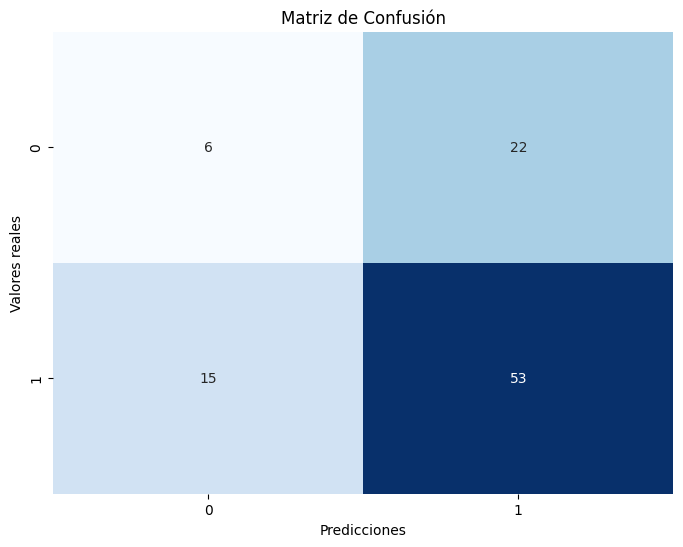


Informe de Clasificación:
              precision    recall  f1-score   support

           N       0.29      0.21      0.24        28
           Y       0.71      0.78      0.74        68

    accuracy                           0.61        96
   macro avg       0.50      0.50      0.49        96
weighted avg       0.58      0.61      0.60        96



In [96]:
# Paso 5: Evaluación del modelo
y_pred = modelo.predict(X_test)

# Calcular la precisión del modelo
precision = accuracy_score(y_test, y_pred)
print(f"\nPrecisión del modelo: {precision:.2f}")

# Mostrar la matriz de confusión
matriz_confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Matriz de Confusión')
plt.show()

# Mostrar el informe de clasificación
informe_clasificacion = classification_report(y_test, y_pred)
print("\nInforme de Clasificación:")
print(informe_clasificacion)

In [98]:
# Paso 6: Guardar el modelo entrenado en un archivo para su uso posterior
# Guardar el modelo en un archivo usando pickle
import pickle

with open('modelo_prestamo.pkl', 'wb') as archivo_salida:
    pickle.dump(modelo, archivo_salida)

# Verificar que se haya creado el modelo en el sistema de archivos

In [100]:

# Paso 7: Cargar el modelo desde el archivo y hacer una predicción
with open('modelo_prestamo.pkl', 'rb') as archivo_entrada:
    modelo_cargado = pickle.load(archivo_entrada)

# Crear un nuevo ejemplo de datos
nuevo_ejemplo = pd.DataFrame({
    'Ingresos_Solicitante': [5000],
    'Ingresos_Cosolicitante': [0],
    'Monto_Prestamo': [300]
})

# Hacer una predicción usando el modelo cargado
prediccion = modelo_cargado.predict(nuevo_ejemplo)
print("\nPredicción:", prediccion)

# Modifique el valor de los ingresos del solicitante a 1000 y vuelva a ejecutar la celda anterior para ver cómo cambia la predicción.




Predicción: ['Y']


In [101]:

# Paso 7: Cargar el modelo desde el archivo y hacer una predicción
with open('modelo_prestamo.pkl', 'rb') as archivo_entrada:
    modelo_cargado = pickle.load(archivo_entrada)

# Crear un nuevo ejemplo de datos
nuevo_ejemplo = pd.DataFrame({
    'Ingresos_Solicitante': [1000],
    'Ingresos_Cosolicitante': [50],
    'Monto_Prestamo': [300]
})

# Hacer una predicción usando el modelo cargado
prediccion = modelo_cargado.predict(nuevo_ejemplo)
print("\nPredicción:", prediccion)

# Modifique el valor de los ingresos del solicitante a 1000 y vuelva a ejecutar la celda anterior para ver cómo cambia la predicción.



Predicción: ['N']


In [102]:
# Paso 7: Cargar el modelo desde el archivo y hacer una predicción
with open('modelo_prestamo.pkl', 'rb') as archivo_entrada:
    modelo_cargado = pickle.load(archivo_entrada)

# Crear un nuevo ejemplo de datos
nuevo_ejemplo = pd.DataFrame({
    'Ingresos_Solicitante': [1000],
    'Ingresos_Cosolicitante': [0],
    'Monto_Prestamo': [50]
})

# Hacer una predicción usando el modelo cargado
prediccion = modelo_cargado.predict(nuevo_ejemplo)
print("\nPredicción:", prediccion)

# Modifique el valor de los ingresos del solicitante a 1000 y vuelva a ejecutar la celda anterior para ver cómo cambia la predicción.



Predicción: ['N']


In [186]:
# aqui se muestra la información de las etiquetas
# que en este caso es la columna 'Estado_Prestamo'  es la que queremos predecir
# en este caso es una variable binaria:  1 si el prestamo fue aprobado y 0 si no fue aprobado

print(yi.value_counts())
data['Estado_Prestamo'] = data['Estado_Prestamo'].replace({"Y": 1, "N": 0})
data['Estado_Prestamo'] = data['Estado_Prestamo'].astype(int)
print(yi.value_counts())
data['Autoempleado'] = data['Autoempleado'].replace({"Si": 1, "No": 0, " ":0})
data['Autoempleado'] = data['Autoempleado'].astype(int)



Estado_Prestamo
1    332
0    148
Name: count, dtype: int64
Estado_Prestamo
1    332
0    148
Name: count, dtype: int64


In [187]:
# Ejercicios a realizar:

# 1. Utiliza otras variables del conjunto de datos para predecir el prestamo
# 2. Utliza otro algoritmo y compara los resultados los resultados

# Paso 3: Dividir el conjunto de datos en características (Xi) y etiquetas (yi)
# Características
# Seleccionamos las columnas de características
# autoempleado, ingresos_solicitante, ingresos_cosolicitante y monto_prestamo como características para el modelo
# y la columna estado_prestamo como etiqueta para predecir
Xi = data[["Ingresos_Solicitante", "Ingresos_Cosolicitante", "Monto_Prestamo","Autoempleado"]]

In [188]:
# Paso 3: Dividir el conjunto de datos en características (X) y etiquetas (y)
# Características
# Seleccionamos las columnas de características
# ingresos_solicitante, ingresos_cosolicitante y monto_prestamo como características para el modelo
# y la columna estado_prestamo como etiqueta para predecir
yi = data["Estado_Prestamo"]

In [189]:
print(Xi.info())

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 1 to 613
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Ingresos_Solicitante    480 non-null    int64  
 1   Ingresos_Cosolicitante  480 non-null    float64
 2   Monto_Prestamo          480 non-null    float64
 3   Autoempleado            480 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 18.8 KB
None


In [190]:
print("\nPrimeras filas del conjunto de datos:")
data.head(5)


Primeras filas del conjunto de datos:


,ID,Genero,Married,Dependientes,Educacion,Autoempleado,Ingresos_Solicitante,Ingresos_Cosolicitante,Monto_Prestamo,Plazo_Prestamo,Historial_Crediticio,Area_Propiedad,Estado_Prestamo
1,LP001003,Hombre,1,1,Graduado,0,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Hombre,1,0,Graduado,1,3000,0.0,66.0,360.0,1.0,Urbano,1
3,LP001006,Hombre,1,0,Not Graduado,0,2583,2358.0,120.0,360.0,1.0,Urbano,1
4,LP001008,Hombre,0,0,Graduado,0,6000,0.0,141.0,360.0,1.0,Urbano,1
5,LP001011,Hombre,1,2,Graduado,1,5417,4196.0,267.0,360.0,1.0,Urbano,1


In [191]:
Xi_train, Xi_test, yi_train, yi_test = train_test_split(Xi, yi, test_size=0.2, random_state=42)

In [192]:
Xi_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 384 entries, 172 to 137
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Ingresos_Solicitante    384 non-null    int64  
 1   Ingresos_Cosolicitante  384 non-null    float64
 2   Monto_Prestamo          384 non-null    float64
 3   Autoempleado            384 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 15.0 KB


In [193]:
# Paso 4: Entrenar un modelo de clasificación (usando Random Forest como ejemplo)
# Crear un modelo de clasificación de bosque aleatorio
modeloXi = RandomForestClassifier(random_state=42)


In [194]:
modeloXi.fit(Xi_train, yi_train)

RandomForestClassifier(random_state=42)


Precisión del modelo: 0.60


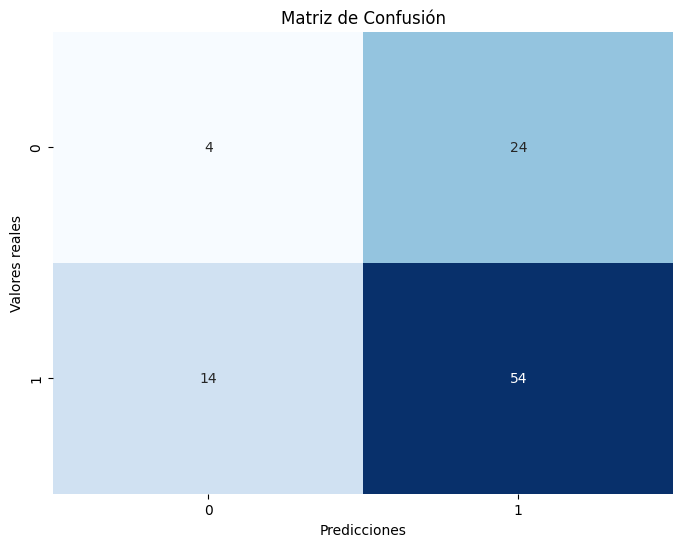


Informe de Clasificación:
              precision    recall  f1-score   support

           N       0.29      0.21      0.24        28
           Y       0.71      0.78      0.74        68

    accuracy                           0.61        96
   macro avg       0.50      0.50      0.49        96
weighted avg       0.58      0.61      0.60        96



In [195]:
# Paso 5: Evaluación del modelo
yi_pred = modeloXi.predict(Xi_test)

# Calcular la precisión del modelo
precision_Xi = accuracy_score(yi_test, yi_pred)
print(f"\nPrecisión del modelo: {precision_Xi:.2f}")

# Mostrar la matriz de confusión
matriz_confusion_xi = confusion_matrix(yi_test, yi_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion_xi, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Matriz de Confusión')
plt.show()

# Mostrar el informe de clasificación
informe_clasificacion_xi = classification_report(yi_test, yi_pred)
print("\nInforme de Clasificación:")
print(informe_clasificacion)

In [196]:
# Paso 6: Guardar el modelo entrenado en un archivo para su uso posterior
# Guardar el modelo en un archivo usando pickle
import pickle

with open('modelo_prestamo_xi.pkl', 'wb') as archivo_salida:
    pickle.dump(modeloXi, archivo_salida)

# Verificar que se haya creado el modelo en el sistema de archivos

In [202]:
# Paso 7: Cargar el modelo desde el archivo y hacer una predicción
with open('modelo_prestamo_xi.pkl', 'rb') as archivo_entrada:
    modelo_cargado_xi = pickle.load(archivo_entrada)

# Crear un nuevo ejemplo de datos
nuevo_ejemplo_xi = pd.DataFrame({
    'Ingresos_Solicitante': [5000],
    'Ingresos_Cosolicitante': [0],
    'Monto_Prestamo': [30],
    'Autoempleado': [1]
})


# Hacer una predicción usando el modelo cargado
prediccion_xi = modelo_cargado_xi.predict(nuevo_ejemplo_xi)
print("\nPredicción:", prediccion_xi)

# Modifique el valor de los ingresos del solicitante a 1000 y vuelva a ejecutar la celda anterior para ver cómo cambia la predicción.


Predicción: [1]
